# MID project DA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

### 1. data

##### 1. 인구 이동 데이터

In [2]:
data_trans = r'C:\Users\jjjun_ii\Documents\GitHub\LIKELION_AI\Project\MID_PROJECT\data\시군구별_이동자수.csv'
df_trans = pd.read_csv(data_trans)
df_trans.head()

,행정구역(시군구)별,2023.01,2023.01.1,2023.01.2,2023.01.3,2023.01.4,2023.01.5,2023.01.6,2023.01.7,2023.02,...,2021.6,2021.7,2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7
0,행정구역(시군구)별,총전입 (명),총전출 (명),순이동 (명),시도내이동-시군구내 (명),시도내이동-시군구간 전입 (명),시도내이동-시군구간 전출 (명),시도간전입 (명),시도간전출 (명),총전입 (명),...,시도간전입 (명),시도간전출 (명),총전입 (명),총전출 (명),순이동 (명),시도내이동-시군구내 (명),시도내이동-시군구간 전입 (명),시도내이동-시군구간 전출 (명),시도간전입 (명),시도간전출 (명)
1,전국,506100,506100,0,164141,145923,145923,196036,196036,622411,...,2447234,2447234,6152155,6152155,0,2173548,1805002,1805002,2173605,2173605
2,서울특별시,91225,94248,-3023,19465,35007,35007,36753,39776,126733,...,461123,567366,1201527,1236867,-35340,302805,468146,468146,430576,465916
3,부산광역시,31180,31800,-620,8601,12723,12723,9856,10476,40851,...,116166,135069,383848,397410,-13562,109335,169621,169621,104892,118454
4,대구광역시,22316,22557,-241,5853,8343,8343,8120,8361,26929,...,83076,107395,265354,276873,-11519,81016,102771,102771,81567,93086


In [3]:
data_trans_age = r'C:\Users\jjjun_ii\Documents\GitHub\LIKELION_AI\Project\MID_PROJECT\data\Sigungu_age_trans.csv'
df_trans_age = pd.read_csv(data_trans_age, encoding='cp949')
df_trans_age.drop('Unnamed: 66', axis=1, inplace=True)
df_trans_age.head()


,행정구역(시군구)별,연령별,항목,단위,2023.01 월,2023.02 월,2023.03 월,2023.04 월,2023.05 월,2023.06 월,...,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,2022 년
0,전국,계,총전입[명],명,506100,622411,588958,455474,497285,473480,...,7411784,7629098,7755286,7378430,7154226,7297099,7104398,7735491,7213422,6152155
1,전국,계,총전출[명],명,506100,622411,588958,455474,497285,473480,...,7411784,7629098,7755286,7378430,7154226,7297099,7104398,7735491,7213422,6152155
2,전국,계,순이동[명],명,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,전국,계,시도내이동-시군구내[명],명,164141,187696,195928,161731,180983,173203,...,2864028,2957867,3014020,2840295,2701400,2776681,2659826,2926406,2649108,2173548
4,전국,계,시도내이동-시군구간 전입[명],명,145923,183174,171026,136415,148019,140977,...,2124327,2163435,2189842,2084793,2041896,2091234,2059624,2274971,2117080,1805002


### 2. DA

##### 1. 도별 인구 순이동량 시각화 (1970 ~ 2023)

In [5]:
df_trans.drop([0, 1], inplace=True)
df_trans.replace('-', np.nan, inplace=True)
df_trans.head()

,행정구역(시군구)별,2023.01,2023.01.1,2023.01.2,2023.01.3,2023.01.4,2023.01.5,2023.01.6,2023.01.7,2023.02,...,2021.6,2021.7,2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7
2,서울특별시,91225,94248,-3023,19465,35007,35007,36753,39776,126733,...,461123,567366,1201527,1236867,-35340,302805,468146,468146,430576,465916
3,부산광역시,31180,31800,-620,8601,12723,12723,9856,10476,40851,...,116166,135069,383848,397410,-13562,109335,169621,169621,104892,118454
4,대구광역시,22316,22557,-241,5853,8343,8343,8120,8361,26929,...,83076,107395,265354,276873,-11519,81016,102771,102771,81567,93086
5,인천광역시,30920,28525,2395,8797,8747,8747,13376,10981,38362,...,155824,144401,395140,367039,28101,123107,116812,116812,155221,127120
6,광주광역시,13713,14728,-1015,4163,4449,4449,5101,6116,17137,...,64721,70604,182924,190566,-7642,62460,65006,65006,55458,63100


In [6]:
# 2023년 월별 분리된 데이터 통합: 2023 1월 ~ 9월 데이터

df_trans["2023.2"] = df_trans["2023.01.2"].apply(lambda x: int(x))
for i in range(2, 10):
    df_trans["2023.2"] += df_trans[f"2023.0{i}.2"].apply(lambda x: int(x))
df_trans["2023.2"]

C:\Users\jjjun_ii\AppData\Local\Temp\ipykernel_18656\909559464.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_trans["2023.2"] = df_trans["2023.01.2"].apply(lambda x: int(x))


2    -16467
3     -8147
4     -4834
5     22371
6     -6484
7      -891
8     -6109
9      1326
10    35049
11     -882
12     2986
13    10603
14    -3710
15    -2140
16    -7027
17   -14556
18    -1088
Name: 2023.2, dtype: int64

In [166]:
# 년도별 순이동 인구 데이터 선별

column_li = df_trans.columns

# ".2"로 끝나면서 "####.##.2" 형식이 아닌 항목 찾기
result_list = [column for column in column_li if re.search(r'\.2$', column) and not re.search(r'\d{4}\.\d{2}\.2$', column)]

# DataFrame
df_trans_diff = df_trans[result_list].astype(np.float64)
df_trans_diff["행정구역(시군구)별"] = df_trans["행정구역(시군구)별"]
df_trans_diff


,1970.2,1971.2,1972.2,1973.2,1974.2,1975.2,1976.2,1977.2,1978.2,1979.2,...,2015.2,2016.2,2017.2,2018.2,2019.2,2020.2,2021.2,2022.2,2023.2,행정구역(시군구)별
2,293828.0,252689.0,138774.0,184590.0,230732.0,459569.0,260890.0,215396.0,278528.0,148425.0,...,-137256.0,-140257.0,-98486.0,-110230.0,-49588.0,-64850.0,-106243.0,-35340.0,-16467.0,서울특별시
3,72518.0,61430.0,42842.0,67400.0,126971.0,111534.0,95499.0,88997.0,112359.0,75430.0,...,-13560.0,-21392.0,-28398.0,-26759.0,-23354.0,-14347.0,-18903.0,-13562.0,-8147.0,부산광역시
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-12940.0,-9260.0,-11936.0,-14242.0,-23673.0,-16835.0,-24319.0,-11519.0,-4834.0,대구광역시
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9538.0,5777.0,-1670.0,-67.0,-2337.0,-15748.0,11423.0,28101.0,22371.0,인천광역시
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-9272.0,-7898.0,-8118.0,-6216.0,-3875.0,-6083.0,-5883.0,-7642.0,-6484.0,광주광역시
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-20616.0,-10631.0,-16175.0,-14753.0,-16342.0,-11097.0,-8931.0,-2996.0,-891.0,대전광역시
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.0,-7622.0,-11917.0,-12654.0,-10172.0,-13584.0,-13674.0,-9536.0,-6109.0,울산광역시
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53044.0,29816.0,34690.0,31433.0,23724.0,13025.0,14085.0,10128.0,1326.0,세종특별자치시
10,98525.0,121277.0,35100.0,87798.0,94597.0,181560.0,124094.0,126455.0,168318.0,197916.0,...,94768.0,133617.0,116162.0,170094.0,134666.0,168373.0,150517.0,43882.0,35049.0,경기도
11,-36222.0,-34994.0,-30734.0,-35802.0,-49300.0,-60210.0,-41882.0,-45713.0,-50777.0,-50280.0,...,4773.0,1892.0,2035.0,-3854.0,1661.0,5457.0,6681.0,7494.0,-882.0,강원특별자치도


In [188]:
# 도별 순인구이동량 시각화 (1970 ~ 2023)
df_trans_diff_do = df_trans_diff.drop([i for i in range(3, 10)])
df_trans_diff_do = df_trans_diff_do.set_index("행정구역(시군구)별")
df_trans_diff_do = df_trans_diff_do.transpose()
df_trans_diff_do.rename(columns={"행정구역(시군구)별":"시기"}, inplace=True)
df_trans_diff_do


행정구역(시군구)별,서울특별시,경기도,강원특별자치도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
1970.2,293828.0,98525.0,-36222.0,-47875.0,-47262.0,-91270.0,-86372.0,-62499.0,-87276.0,-3154.0
1971.2,252689.0,121277.0,-34994.0,-44692.0,-50341.0,-74495.0,-85649.0,-57379.0,-83934.0,-3912.0
1972.2,138774.0,35100.0,-30734.0,-24957.0,-22371.0,-37017.0,-41002.0,-13590.0,-47696.0,651.0
1973.2,184590.0,87798.0,-35802.0,-33921.0,-38158.0,-53076.0,-59451.0,-25200.0,-59260.0,-2917.0
1974.2,230732.0,94597.0,-49300.0,-40750.0,-51328.0,-71645.0,-83974.0,-27208.0,-55326.0,-5577.0
1975.2,459569.0,181560.0,-60210.0,-78248.0,-80524.0,-137347.0,-133291.0,-83254.0,-116412.0,-9901.0
1976.2,260890.0,124094.0,-41882.0,-49003.0,-51981.0,-86763.0,-71088.0,-58531.0,-95125.0,-7042.0
1977.2,215396.0,126455.0,-45713.0,-56369.0,-43393.0,-81468.0,-76770.0,-61277.0,-52227.0,-8395.0
1978.2,278528.0,168318.0,-50777.0,-84617.0,-37483.0,-94771.0,-90449.0,-62378.0,-45105.0,-9636.0
1979.2,148425.0,197916.0,-50280.0,-56244.0,-45182.0,-83574.0,-86252.0,-49378.0,-31492.0,-4853.0


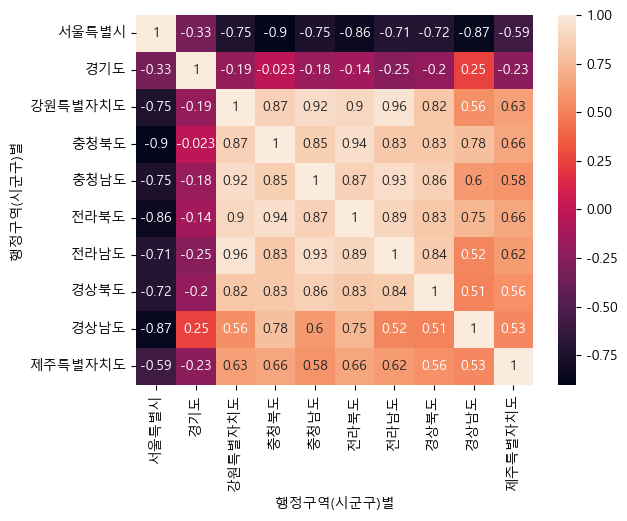

In [189]:
df_trans_diff_do_corr = df_trans_diff_do.corr()

plt.rcParams["axes.unicode_minus"] = False
sns.heatmap(df_trans_diff_do_corr, annot=True)
plt.show()

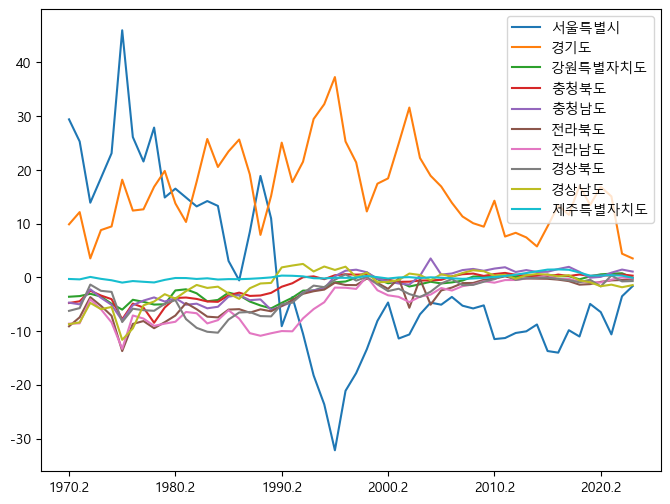

In [190]:
(df_trans_diff_do/10000).plot(kind="line", figsize=(8,6))

plt.rcParams["axes.unicode_minus"] = False
plt.rc("font", family="Malgun Gothic")
plt.legend()
plt.show()

##### 2. 시도별 인구 순이동량 결측치 제거 시각화 (2012 ~ 2023)

In [167]:
# 결측치 데이터 제외
df_trans_diff_dropna = df_trans_diff.dropna(axis=1)
df_trans_diff_dropna

,2012.2,2013.2,2014.2,2015.2,2016.2,2017.2,2018.2,2019.2,2020.2,2021.2,2022.2,2023.2,행정구역(시군구)별
2,-103647.0,-100550.0,-87831.0,-137256.0,-140257.0,-98486.0,-110230.0,-49588.0,-64850.0,-106243.0,-35340.0,-16467.0,서울특별시
3,-20610.0,-17710.0,-15092.0,-13560.0,-21392.0,-28398.0,-26759.0,-23354.0,-14347.0,-18903.0,-13562.0,-8147.0,부산광역시
4,-10564.0,-11351.0,-15526.0,-12940.0,-9260.0,-11936.0,-14242.0,-23673.0,-16835.0,-24319.0,-11519.0,-4834.0,대구광역시
5,27794.0,22035.0,9324.0,9538.0,5777.0,-1670.0,-67.0,-2337.0,-15748.0,11423.0,28101.0,22371.0,인천광역시
6,-1825.0,-2592.0,-2977.0,-9272.0,-7898.0,-8118.0,-6216.0,-3875.0,-6083.0,-5883.0,-7642.0,-6484.0,광주광역시
7,499.0,311.0,-8838.0,-20616.0,-10631.0,-16175.0,-14753.0,-16342.0,-11097.0,-8931.0,-2996.0,-891.0,대전광역시
8,4006.0,2307.0,2786.0,-80.0,-7622.0,-11917.0,-12654.0,-10172.0,-13584.0,-13674.0,-9536.0,-6109.0,울산광역시
9,17493.0,8696.0,33456.0,53044.0,29816.0,34690.0,31433.0,23724.0,13025.0,14085.0,10128.0,1326.0,세종특별자치시
10,82753.0,74131.0,57396.0,94768.0,133617.0,116162.0,170094.0,134666.0,168373.0,150517.0,43882.0,35049.0,경기도
11,712.0,2986.0,2085.0,4773.0,1892.0,2035.0,-3854.0,1661.0,5457.0,6681.0,7494.0,-882.0,강원특별자치도


In [168]:
df_trans_diff_dropna = df_trans_diff_dropna.set_index("행정구역(시군구)별")
df_trans_diff_dropna = df_trans_diff_dropna.transpose()
columns_li = list(df_trans_diff_dropna.columns)

# 수도권 칼럼 리스트화
capital_li = []
for i in [0, 3, 8]:
    capital_li.append(columns_li[i])

# 비수도권 칼럼 리스트화
for i in [0, 2, 6]:
    del columns_li[i]
noncapital_li = columns_li

df_trans_diff_dropna["수도권"] = df_trans_diff_dropna[capital_li].sum(axis=1)
df_trans_diff_dropna["비수도권"] = df_trans_diff_dropna[noncapital_li].sum(axis=1)
df_trans_diff_dropna

행정구역(시군구)별,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원특별자치도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,수도권,비수도권
2012.2,-103647.0,-20610.0,-10564.0,27794.0,-1825.0,499.0,4006.0,17493.0,82753.0,712.0,4641.0,9849.0,-3291.0,-5054.0,-4860.0,-2772.0,4876.0,6900.0,-6900.0
2013.2,-100550.0,-17710.0,-11351.0,22035.0,-2592.0,311.0,2307.0,8696.0,74131.0,2986.0,3113.0,13375.0,-2197.0,-2306.0,-1865.0,3794.0,7823.0,-4384.0,4384.0
2014.2,-87831.0,-15092.0,-15526.0,9324.0,-2977.0,-8838.0,2786.0,33456.0,57396.0,2085.0,2367.0,9810.0,-2563.0,-596.0,-988.0,6075.0,11112.0,-21111.0,21111.0
2015.2,-137256.0,-13560.0,-12940.0,9538.0,-9272.0,-20616.0,-80.0,53044.0,94768.0,4773.0,1438.0,10272.0,-2830.0,3936.0,-577.0,5105.0,14257.0,-32950.0,32950.0
2016.2,-140257.0,-21392.0,-9260.0,5777.0,-7898.0,-10631.0,-7622.0,29816.0,133617.0,1892.0,5011.0,15318.0,-4419.0,-3205.0,-3151.0,1772.0,14632.0,-863.0,863.0
2017.2,-98486.0,-28398.0,-11936.0,-1670.0,-8118.0,-16175.0,-11917.0,34690.0,116162.0,2035.0,2262.0,19401.0,-7206.0,-3047.0,-5581.0,3979.0,14005.0,16006.0,-16006.0
2018.2,-110230.0,-26759.0,-14242.0,-67.0,-6216.0,-14753.0,-12654.0,31433.0,170094.0,-3854.0,5149.0,10084.0,-13773.0,-8030.0,-9225.0,-5810.0,8853.0,59797.0,-59797.0
2019.2,-49588.0,-23354.0,-23673.0,-2337.0,-3875.0,-16342.0,-10172.0,23724.0,134666.0,1661.0,2565.0,-794.0,-12748.0,-8788.0,-4571.0,-9310.0,2936.0,82741.0,-82741.0
2020.2,-64850.0,-14347.0,-16835.0,-15748.0,-6083.0,-11097.0,-13584.0,13025.0,168373.0,5457.0,3454.0,741.0,-8494.0,-9754.0,-16978.0,-16658.0,3378.0,87775.0,-87775.0
2021.2,-106243.0,-18903.0,-24319.0,11423.0,-5883.0,-8931.0,-13674.0,14085.0,150517.0,6681.0,3462.0,8522.0,-5801.0,-4487.0,3337.0,-13703.0,3917.0,55697.0,-55697.0


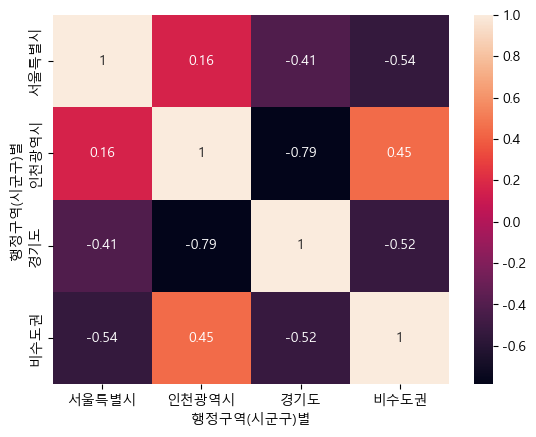

In [182]:
df_trans_diff_dropna_corr = df_trans_diff_dropna[["서울특별시", "인천광역시", "경기도", "비수도권"]].corr()

# plt.figure(figsize=(8,8))
sns.heatmap(df_trans_diff_dropna_corr, annot=True)
plt.show()

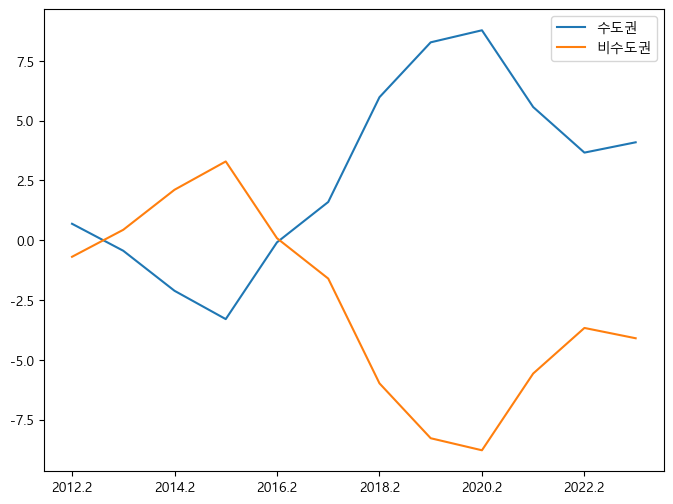

In [170]:
(df_trans_diff_dropna/10000)[["수도권", "비수도권"]].plot(kind="line", figsize=(8,6))

plt.rcParams["axes.unicode_minus"] = False
plt.rc("font", family="Malgun Gothic")
plt.legend()
plt.show()

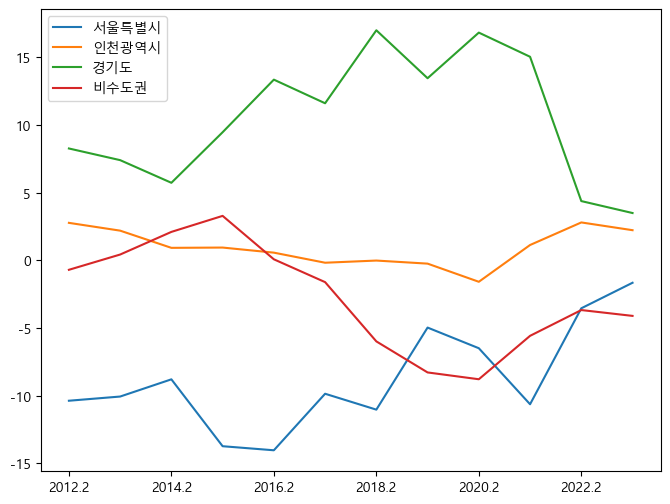

In [171]:
(df_trans_diff_dropna/10000)[["서울특별시", "인천광역시", "경기도", "비수도권"]].plot(kind="line", figsize=(8,6))

plt.rcParams["axes.unicode_minus"] = False
plt.rc("font", family="Malgun Gothic")
plt.legend()
plt.show()

##### 3. 시도별 결측치 포함 인구 순이동량 시각화 (1970 ~ 2023)

In [192]:
df_trans_diff_all = df_trans_diff.set_index("행정구역(시군구)별")
df_trans_diff_all = df_trans_diff_all.transpose()
df_trans_diff_all.fillna(0, inplace=True)

# 2번에서 구했던 capital_li, noncaplital_li

df_trans_diff_all["수도권"] = df_trans_diff_all[capital_li].sum(axis=1)
df_trans_diff_all["비수도권"] = df_trans_diff_all[noncapital_li].sum(axis=1)

df_trans_diff_all

행정구역(시군구)별,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원특별자치도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도,수도권,비수도권
1970.2,293828.0,72518.0,0.0,0.0,0.0,0.0,0.0,0.0,98525.0,-36222.0,-47875.0,-47262.0,-91270.0,-86372.0,-62499.0,-87276.0,-3154.0,392353.0,-389412.0
1971.2,252689.0,61430.0,0.0,0.0,0.0,0.0,0.0,0.0,121277.0,-34994.0,-44692.0,-50341.0,-74495.0,-85649.0,-57379.0,-83934.0,-3912.0,373966.0,-373966.0
1972.2,138774.0,42842.0,0.0,0.0,0.0,0.0,0.0,0.0,35100.0,-30734.0,-24957.0,-22371.0,-37017.0,-41002.0,-13590.0,-47696.0,651.0,173874.0,-173874.0
1973.2,184590.0,67400.0,0.0,0.0,0.0,0.0,0.0,0.0,87798.0,-35802.0,-33921.0,-38158.0,-53076.0,-59451.0,-25200.0,-59260.0,-2917.0,272388.0,-240385.0
1974.2,230732.0,126971.0,0.0,0.0,0.0,0.0,0.0,0.0,94597.0,-49300.0,-40750.0,-51328.0,-71645.0,-83974.0,-27208.0,-55326.0,-5577.0,325329.0,-258137.0
1975.2,459569.0,111534.0,0.0,0.0,0.0,0.0,0.0,0.0,181560.0,-60210.0,-78248.0,-80524.0,-137347.0,-133291.0,-83254.0,-116412.0,-9901.0,641129.0,-587653.0
1976.2,260890.0,95499.0,0.0,0.0,0.0,0.0,0.0,0.0,124094.0,-41882.0,-49003.0,-51981.0,-86763.0,-71088.0,-58531.0,-95125.0,-7042.0,384984.0,-365916.0
1977.2,215396.0,88997.0,0.0,0.0,0.0,0.0,0.0,0.0,126455.0,-45713.0,-56369.0,-43393.0,-81468.0,-76770.0,-61277.0,-52227.0,-8395.0,341851.0,-336615.0
1978.2,278528.0,112359.0,0.0,0.0,0.0,0.0,0.0,0.0,168318.0,-50777.0,-84617.0,-37483.0,-94771.0,-90449.0,-62378.0,-45105.0,-9636.0,446846.0,-362857.0
1979.2,148425.0,75430.0,0.0,0.0,0.0,0.0,0.0,0.0,197916.0,-50280.0,-56244.0,-45182.0,-83574.0,-86252.0,-49378.0,-31492.0,-4853.0,346341.0,-331825.0


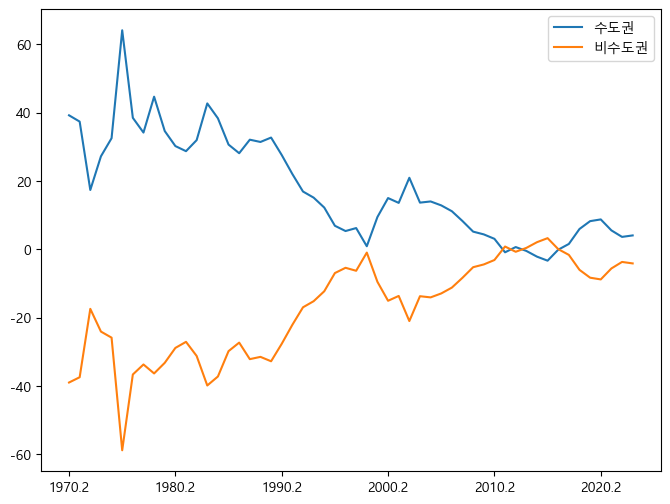

In [193]:
(df_trans_diff_all/10000)[["수도권", "비수도권"]].plot(kind="line", figsize=(8,6))

plt.rcParams["axes.unicode_minus"] = False
plt.rc("font", family="Malgun Gothic")
plt.legend()
plt.show()

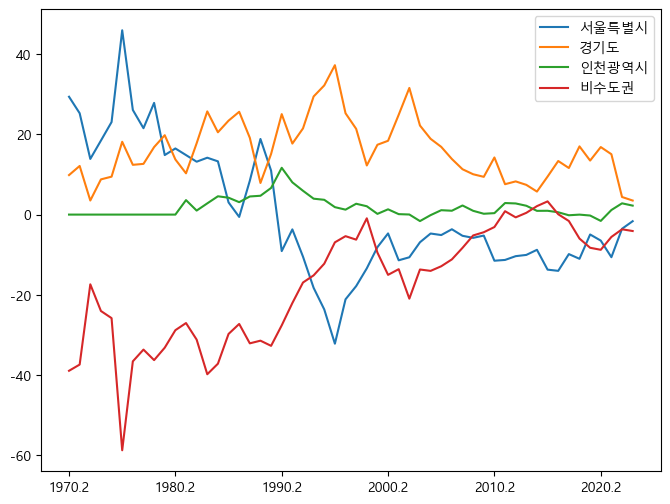

In [194]:
(df_trans_diff_all/10000)[["서울특별시", "경기도", "인천광역시", "비수도권"]].plot(kind="line", figsize=(8,6))

plt.rcParams["axes.unicode_minus"] = False
plt.rc("font", family="Malgun Gothic")
plt.legend()
plt.show()

##### 4. 시도별, 연령대별 인구 순이동량 시각화 (1995 ~ 2023)

In [4]:
# 필요 없는 데이터 제거
df_trans_age_diff = df_trans_age[df_trans_age["항목"] == "순이동[명]"]
df_trans_age_diff = df_trans_age_diff[df_trans_age_diff["행정구역(시군구)별"] != "전국"]
df_trans_age_diff = df_trans_age_diff[df_trans_age_diff["연령별"] != "계"]
df_trans_age_diff.drop(columns=["항목", "단위"], inplace=True)

# 2023년 데이터 통합
columns_li = df_trans_age_diff.columns
selected_columns_li = [column for column in columns_li if re.search(r'2023+', column)]
df_trans_age_diff["2023 년"] = df_trans_age_diff[selected_columns_li].sum(axis=1)
df_trans_age_diff.drop(columns=selected_columns_li, inplace=True)

# 데이터가 존재하지 않는 (1970 ~ 1994) 칼럼 삭제
drop_columns_li = [(str(i) + ' 년') for i in range(1970, 1995)]
df_trans_age_diff.drop(columns=drop_columns_li, inplace=True)

# 시각화 데이터 만들기
df_trans_age_diff = df_trans_age_diff.set_index("행정구역(시군구)별")
df_trans_age_diff = df_trans_age_diff.transpose()
df_trans_age_diff

# 데이터 타입 float으로 변경
df_trans_age_diff.loc["1995 년":] = df_trans_age_diff.loc["1995 년":].astype(np.float64)

# 결측치 0으로 대체
df_trans_age_diff.fillna(0, inplace=True)

df_trans_age_diff

행정구역(시군구)별,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,...,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도,제주특별자치도
연령별,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,45 - 49세,...,35 - 39세,40 - 44세,45 - 49세,50 - 54세,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80세이상
1995 년,-48417.0,-28220.0,-13319.0,-14278.0,3626.0,-32300.0,-58979.0,-36785.0,-20414.0,-18595.0,...,243.0,83.0,28.0,27.0,68.0,10.0,-8.0,1.0,10.0,-3.0
1996 년,-36491.0,-16111.0,-3758.0,-9286.0,9466.0,-25527.0,-44143.0,-21452.0,-12688.0,-12515.0,...,137.0,68.0,44.0,75.0,59.0,21.0,22.0,19.0,8.0,-3.0
1997 년,-30324.0,-15941.0,-4023.0,-8509.0,12002.0,-14467.0,-38115.0,-21040.0,-12663.0,-11037.0,...,225.0,128.0,86.0,60.0,30.0,32.0,9.0,29.0,6.0,-11.0
1998 년,-23899.0,-14053.0,-3256.0,-4722.0,10905.0,-13009.0,-32069.0,-18039.0,-9002.0,-6501.0,...,381.0,252.0,137.0,63.0,28.0,23.0,19.0,20.0,11.0,-9.0
1999 년,-20875.0,-7790.0,1461.0,-2043.0,18733.0,311.0,-26111.0,-10669.0,-5250.0,-6263.0,...,448.0,200.0,40.0,21.0,39.0,32.0,28.0,6.0,5.0,-14.0
2000 년,-15589.0,-4905.0,4166.0,1263.0,17871.0,9071.0,-19054.0,-6372.0,-2148.0,-6150.0,...,14.0,74.0,40.0,50.0,5.0,40.0,-16.0,17.0,10.0,-9.0
2001 년,-23305.0,-8141.0,2689.0,-1773.0,13372.0,-4555.0,-29223.0,-9951.0,-4807.0,-9740.0,...,191.0,99.0,149.0,43.0,29.0,48.0,57.0,9.0,32.0,-6.0
2002 년,-20289.0,-3014.0,3965.0,695.0,16796.0,-12502.0,-27130.0,-8135.0,-5838.0,-10521.0,...,288.0,153.0,69.0,86.0,67.0,44.0,25.0,30.0,30.0,-30.0
2003 년,-15253.0,-3587.0,4578.0,1204.0,15506.0,-517.0,-23421.0,-7779.0,-3052.0,-7237.0,...,207.0,7.0,-4.0,33.0,84.0,58.0,-7.0,19.0,-7.0,-25.0


In [22]:
# 지역별 선정
def select_area(df_trans_age_diff : pd.DataFrame, area_name : str) -> pd.DataFrame:
    
    # 지역 선정
    df_trans_age_diff_selec = df_trans_age_diff[area_name]
    df_trans_age_diff_selec.columns = df_trans_age_diff_selec.loc["연령별"]
    df_trans_age_diff_selec.drop("연령별", inplace=True)

    # 인구 수 10세 단위로 변경
    df_trans_age_diff_selec_10 = pd.DataFrame()
    columns_li = list(df_trans_age_diff_selec.columns)
    for age in range(0, 80, 10):
        count = 0
        for column in columns_li:
            if count == 0:
                df_trans_age_diff_selec_10[f'{age}-{age+9}세'] = df_trans_age_diff_selec[column]
                count += 1
            elif count == 1:
                df_trans_age_diff_selec_10[f'{age}-{age+9}세'] += df_trans_age_diff_selec[column]
                count += 1
            else: 
                for idx in range(2):
                    del columns_li[idx]
                break
            
    df_trans_age_diff_selec_10["80세이상"] = df_trans_age_diff_selec["80세이상"]
    
    return df_trans_age_diff_selec_10

C:\Users\jjjun_ii\AppData\Local\Temp\ipykernel_23524\3232753032.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans_age_diff_selec.drop("연령별", inplace=True)


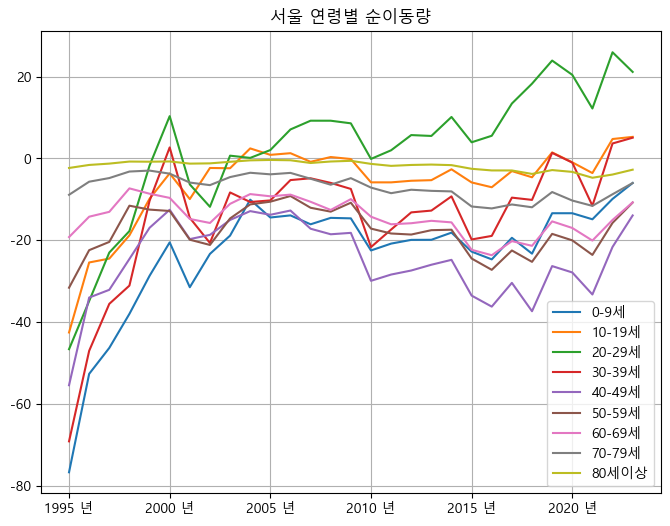

In [11]:
# 서울 지역
df_trans_age_diff_seoul_10 = select_area(df_trans_age_diff, "서울특별시")

# 서울 시각화
(df_trans_age_diff_seoul_10/1000).plot(kind="line", figsize=(8,6))

plt.rcParams["axes.unicode_minus"] = False
plt.title("서울 연령별 순이동량")
plt.rc("font", family="Malgun Gothic")
plt.grid()
plt.legend()
plt.show()

C:\Users\jjjun_ii\AppData\Local\Temp\ipykernel_23524\3232753032.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans_age_diff_selec.drop("연령별", inplace=True)


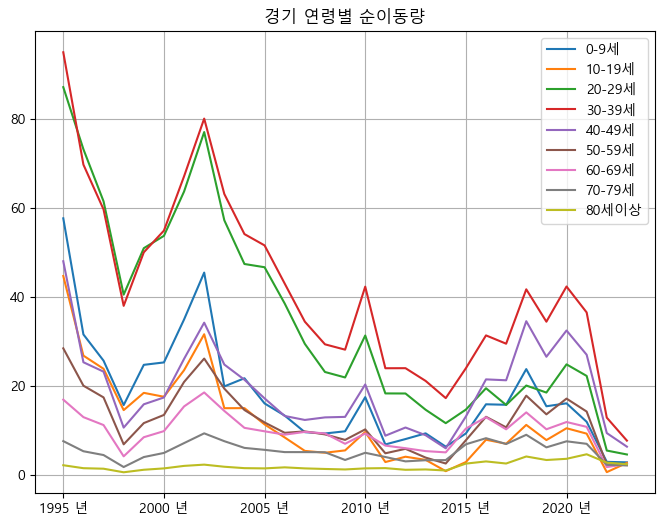

In [13]:
df_trans_age_diff_gyenonggi_10 = select_area(df_trans_age_diff, "경기도") 

# 경기도 시각화
(df_trans_age_diff_gyenonggi_10/1000).plot(kind="line", figsize=(8,6))

plt.rcParams["axes.unicode_minus"] = False
plt.title("경기 연령별 순이동량")
plt.rc("font", family="Malgun Gothic")
plt.grid()
plt.legend()
plt.show()

C:\Users\jjjun_ii\AppData\Local\Temp\ipykernel_23524\3232753032.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans_age_diff_selec.drop("연령별", inplace=True)


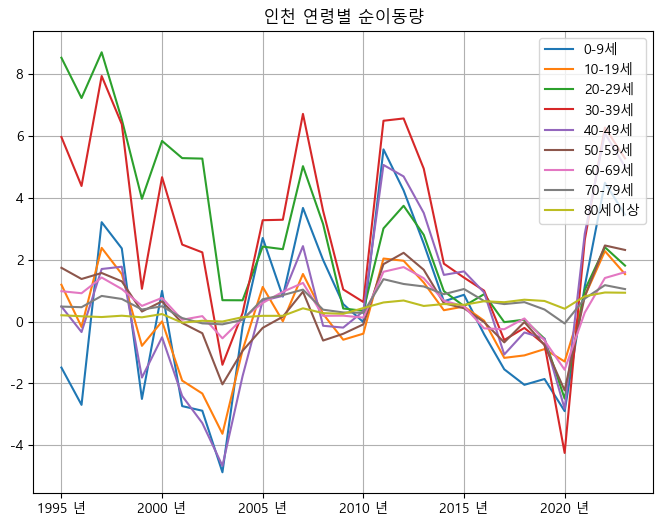

In [14]:
df_trans_age_diff_incheon_10 = select_area(df_trans_age_diff, "인천광역시") 

# 경기도 시각화
(df_trans_age_diff_incheon_10/1000).plot(kind="line", figsize=(8,6))

plt.rcParams["axes.unicode_minus"] = False
plt.title("인천 연령별 순이동량")
plt.rc("font", family="Malgun Gothic")
plt.grid()
plt.legend()
plt.show()

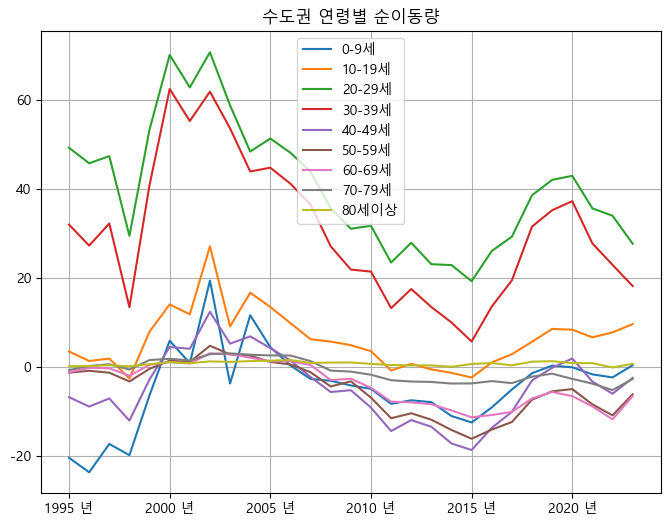

In [21]:
# 수도권 순이동량 시각화
df_trans_age_diff_capital_10 = df_trans_age_diff_seoul_10 + df_trans_age_diff_gyenonggi_10 + df_trans_age_diff_incheon_10

(df_trans_age_diff_capital_10/1000).plot(kind="line", figsize=(8,6))

plt.rcParams["axes.unicode_minus"] = False
plt.title("수도권 연령별 순이동량")
plt.rc("font", family="Malgun Gothic")
plt.grid()
plt.legend()
plt.show()

C:\Users\jjjun_ii\AppData\Local\Temp\ipykernel_23524\1769495359.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans_age_diff_selec.drop("연령별", inplace=True)
C:\Users\jjjun_ii\AppData\Local\Temp\ipykernel_23524\1769495359.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trans_age_diff_selec.drop("연령별", inplace=True)
C:\Users\jjjun_ii\AppData\Local\Temp\ipykernel_23524\1769495359.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

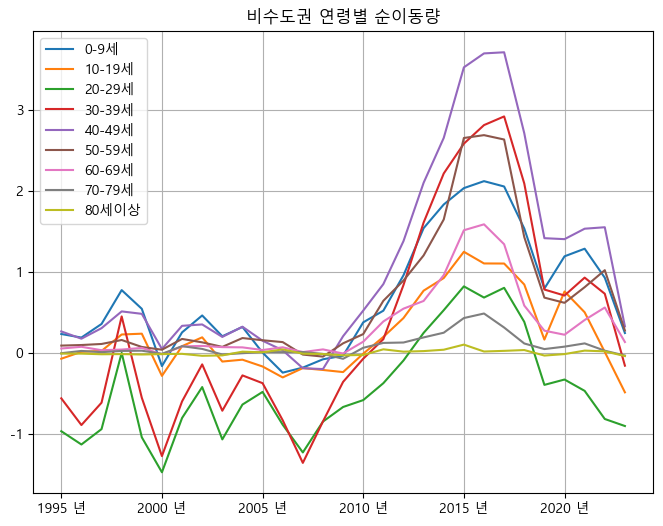

In [33]:
# 비수도권 순이동량 시각화
area_li = list(df_trans_age["행정구역(시군구)별"].unique())

capital_li = ["전국", "서울특별시", "인천광역시", "경기도"]
for capital_area in capital_li:
    area_li.remove(capital_area)
area_li

count = 0
for area_name in area_li:
    df_trans_age_diff_selected = select_area(df_trans_age_diff, area_name)
    if count == 0:
        df_trans_age_diff_noncapital_10 = df_trans_age_diff_selected
    else:
        df_trans_age_diff_noncapital_10 += df_trans_age_diff_selected

(df_trans_age_diff_noncapital_10/1000).plot(kind="line", figsize=(8,6))

plt.rcParams["axes.unicode_minus"] = False
plt.title("비수도권 연령별 순이동량")
plt.rc("font", family="Malgun Gothic")
plt.grid()
plt.legend()
plt.show()

# MID Project Employ DA

### 1. data

##### 1. 행정구역(시도)/산업별 취업자 (단위: 천명)
- 시도별 산업 종사자 격차 파악 (산업별 현황 비율)
- 년도별, 시도별 취업자 수 변화량과 추이
- 산업별 가중치?

In [49]:
data1 = r'C:\Users\jjjun_ii\Documents\GitHub\LIKELION_AI\Project\MID_PROJECT\data\행정구역_시도__산업별_취업자.csv'
df_emp = pd.read_csv(data1)
df_emp.head()

,시도별,산업별,2023.01,2023.02,2023.03,2023.04,2023.05,2023.06,2023.07,2023.08,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,계,계,27363,27714,28223,28432,28835,28812,28686,28678,...,25299,25897,26178,26409,26725,26822,27123,26904,27273,28089
1,계,"A 농업, 임업 및 어업(01~03)",1199,1231,1438,1557,1654,1663,1622,1644,...,1513,1446,1337,1273,1279,1340,1395,1445,1458,1526
2,계,"* 광공업(B,C)",4438,4429,4470,4428,4474,4498,4493,4468,...,4322,4471,4618,4603,4589,4529,4444,4389,4380,4512
3,계,B 광업(05~08),7,7,8,7,9,10,7,8,...,16,13,14,19,23,19,15,13,12,9
4,계,C 제조업(10~34),4432,4423,4463,4421,4464,4488,4485,4460,...,4307,4459,4604,4584,4566,4510,4429,4376,4368,4503


- 행정구역(시도)/산업별 취업자 연령별

In [35]:
data2 = r'C:\Users\jjjun_ii\Documents\GitHub\LIKELION_AI\Project\MID_PROJECT\data\산업별 취업자_성_연령별.csv'
df_emp_age = pd.read_csv(data2, encoding='cp949')
df_emp_age.drop('Unnamed: 25', axis=1, inplace=True)
df_emp_age.head()

,성별,행정구역별,연령별,항목,단위,2013. 1/2,2013. 2/2,2014. 1/2,2014. 2/2,2015. 1/2,...,2018. 1/2,2018. 2/2,2019. 1/2,2019. 2/2,2020. 1/2,2020. 2/2,2021. 1/2,2021. 2/2,2022. 1/2,2022. 2/2
0,전체,전국,계,합계,NaN,25186.58626,25657.67830,25834.60370,26099.03937,25991.48465,...,26711.29366,26924.74284,26870.72813,27346.83918,26397.32881,26916.90112,27213.59232,27740.74699,28078.30968,28417.86366
1,전체,전국,계,농림어업,NaN,1585.58672,1742.63917,1556.08159,1602.28053,1421.76187,...,1393.56601,1492.53897,1406.33668,1551.32599,1479.33688,1573.95216,1476.33225,1593.99323,1544.66108,1640.60640
2,전체,전국,계,광업,NaN,17.51169,14.84445,14.07833,8.68305,13.35277,...,22.30169,14.89440,15.10557,14.85899,14.79954,10.5006,12.76848,10.66067,13.10791,6.12520
3,전체,전국,계,제조업,NaN,4255.06091,4279.32812,4360.50622,4419.64827,4507.11464,...,4417.74344,4454.14493,4365.90571,4381.63380,4322.13703,4283.33287,4386.11068,4323.55863,4517.98609,4524.94367
4,전체,전국,계,"전기,가스,증기 및 수도사업",NaN,89.55611,88.43435,83.69547,86.08151,93.61092,...,91.67292,84.63680,85.23512,88.89853,83.41409,93.8141,64.53602,76.66299,76.05670,84.03880


##### 2. 전국 시군구 단위 소득 구간대별 주민 비율
- 소득 2천만원 주민 비율 ~ 소득 7천만원 이상 주민 비율
- 2023.09

In [5]:
data3 = r'C:\Users\jjjun_ii\Documents\GitHub\LIKELION_AI\Project\MID_PROJECT\data\시군구단위소득구간대.csv'
df_inc = pd.read_csv(data3)
df_inc.head()

,BASE_YM,SIGNGU_NM,SIGNGU_CD,INCOME_TWO_TMW_INHBT_RATE,INCOME_THREE_TMW_INHBT_RATE,INCOME_FOUR_TMW_INHBT_RATE,INCOME_FIVE_TMW_INHBT_RATE,INCOME_SIX_TMW_INHBT_RATE,INCOME_SEVEN_TMW_INHBT_RATE,INCOME_SEVEN_TMW_ABOVE_INHBT_RATE
0,202309,강원특별자치도 강릉시,51150,0.15,0.37,0.25,0.11,0.05,0.03,0.04
1,202309,강원특별자치도 고성군,51820,0.18,0.42,0.23,0.08,0.04,0.02,0.03
2,202309,강원특별자치도 동해시,51170,0.14,0.36,0.26,0.11,0.06,0.03,0.05
3,202309,강원특별자치도 삼척시,51230,0.16,0.38,0.24,0.10,0.05,0.03,0.04
4,202309,강원특별자치도 속초시,51210,0.14,0.37,0.27,0.11,0.05,0.03,0.04


- 평균 임금 데이터

In [11]:
data4 = r'C:\Users\jjjun_ii\Documents\GitHub\LIKELION_AI\Project\MID_PROJECT\data\시군구평균임금.csv'
df_inc_mean = pd.read_csv(data4)
df_inc_mean.head()

,BASE_YM,SIGNGU_NM,SIGNGU_CD,AVRG_INCOME_PRICE
0,202309,강원특별자치도 강릉시,51150,34650
1,202309,강원특별자치도 고성군,51820,31933
2,202309,강원특별자치도 동해시,51170,35029
3,202309,강원특별자치도 삼척시,51230,33474
4,202309,강원특별자치도 속초시,51210,34371


##### 3. 임금 근로 일자리 동향 행정

In [23]:
data5 = r'C:\Users\jjjun_ii\Documents\GitHub\LIKELION_AI\Project\MID_PROJECT\data\임금근로일자리동향.csv'
df_worksup = pd.read_csv(data5, encoding='cp949')
df_worksup.drop('Unnamed: 26', axis=1, inplace=True)
df_worksup.head()

,연령별,산업대분류별,일자리형태별,항목,단위,2018.1/4,2018.2/4,2018.3/4,2018.4/4,2019.1/4,...,2020.4/4,2021.1/4,2021.2/4,2021.3/4,2021.4/4,2022.1/4,2022.2/4,2022.3/4,2022.4/4,2023.1/4
0,총 계,총 계,총 계,임금근로 일자리수[만개],만개,1774.5,1822.1,1810.4,1849.4,1824.8,...,1958.9,1899.7,1957.7,1959.9,1996.5,1974.9,2020.5,2019.6,2045.6,2020.7
1,총 계,총 계,총 계,산업별 구성비[%],%,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,총 계,총 계,총 계,형태별 구성비[%],%,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,총 계,총 계,지속,임금근로 일자리수[만개],만개,1203.7,1226.6,1225.1,1240.8,1235.4,...,1357.3,1350.0,1362.6,1363.9,1380.6,1370.4,1396.7,1398.9,1417.6,1416.2
4,총 계,총 계,지속,산업별 구성비[%],%,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


##### 4. 일자리의 질 지수 산출 데이터

### 2. DA

##### 1. 산업별 취업자

In [50]:
# 2023 데이터 통합
df_emp["2023"] = round((df_emp.loc[:, "2023.01":"2023.09"].sum(axis=1) / 9))
drop_columns_li = [f'2023.0{i}' for i in range(1, 10)]
df_emp.drop(columns=drop_columns_li, inplace=True)
df_emp


,시도별,산업별,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,계,계,25299,25897,26178,26409,26725,26822,27123,26904,27273,28089,28382.0
1,계,"A 농업, 임업 및 어업(01~03)",1513,1446,1337,1273,1279,1340,1395,1445,1458,1526,1518.0
2,계,"* 광공업(B,C)",4322,4471,4618,4603,4589,4529,4444,4389,4380,4512,4462.0
3,계,B 광업(05~08),16,13,14,19,23,19,15,13,12,9,8.0
4,계,C 제조업(10~34),4307,4459,4604,4584,4566,4510,4429,4376,4368,4503,4454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,제주도,* 사회간접자본 및 기타서비스업(D~U),232,255,271,284,306,301,303,292,302,323,333.0
176,제주도,F 건설업(41~42),24,23,29,31,37,34,36,33,37,36,35.0
177,제주도,"* 도소매·숙박음식점업(G,I)",70,85,95,93,93,90,89,90,93,98,99.0
178,제주도,"* 사업·개인·공공서비스 및 기타(E,L~U)",110,109,109,120,136,136,137,134,139,156,162.0


In [ ]:
df_emp

In [82]:
# 결측 데이터 처리
df_emp = df_emp.replace('-', 0)

# 산업별 계 데이터
df_emp_total = df_emp[df_emp["시도별"] == "계"]

# 시도별 산업 데이터
df_emp_sido = df_emp[df_emp["시도별"] != '계']
df_emp_sido = df_emp_sido.set_index("시도별")
df_emp_sido = df_emp_sido.transpose()
df_emp_sido

시도별,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,부산광역시,...,경상남도,제주도,제주도,제주도,제주도,제주도,제주도,제주도,제주도,제주도
산업별,계,"A 농업, 임업 및 어업(01~03)","* 광공업(B,C)",C 제조업(10~34),* 사회간접자본 및 기타서비스업(D~U),F 건설업(41~42),"* 도소매·숙박음식점업(G,I)","* 사업·개인·공공서비스 및 기타(E,L~U)","* 전기·운수·통신·금융(D,H,J,K)",계,...,"* 전기·운수·통신·금융(D,H,J,K)",계,"A 농업, 임업 및 어업(01~03)","* 광공업(B,C)",C 제조업(10~34),* 사회간접자본 및 기타서비스업(D~U),F 건설업(41~42),"* 도소매·숙박음식점업(G,I)","* 사업·개인·공공서비스 및 기타(E,L~U)","* 전기·운수·통신·금융(D,H,J,K)"
2013,5146,4,484,483,4658,337,1342,2099,880,1670,...,153,309,62,14,14,232,24,70,110,29
2014,5209,3,507,505,4699,333,1442,2093,831,1693,...,152,322,53,14,14,255,23,85,109,38
2015,5165,5,510,508,4650,330,1436,2073,812,1684,...,174,339,55,14,14,271,29,95,109,38
2016,5146,7,484,484,4656,344,1368,2141,802,1686,...,163,355,57,14,14,284,31,93,120,39
2017,5152,10,453,453,4690,366,1350,2202,772,1685,...,151,374,55,13,13,306,37,93,136,41
2018,5080,7,450,450,4624,353,1319,2169,784,1657,...,151,372,59,12,12,301,34,90,136,41
2019,5086,8,449,449,4630,347,1277,2211,796,1676,...,152,382,67,12,12,303,36,89,137,41
2020,5051,7,447,447,4597,333,1198,2236,831,1640,...,157,378,74,13,12,292,33,90,134,34
2021,5055,5,442,442,4609,334,1158,2198,918,1657,...,149,383,67,15,14,302,37,93,139,33


In [80]:
# 지역 선정
def select_area_emp(df_emp_sido : pd.DataFrame, area_name : str) -> pd.DataFrame:
    df_emp_sido_selected = df_emp_sido[area_name]
    df_emp_sido_selected.columns = df_emp_sido_selected.loc["산업별"]
    df_emp_sido_selected.drop("산업별", inplace=True)
    df_emp_sido_selected = df_emp_sido_selected.astype(np.float64)
    
    return df_emp_sido_selected

C:\Users\jjjun_ii\AppData\Local\Temp\ipykernel_23524\2914273895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp_sido_selected.drop("산업별", inplace=True)


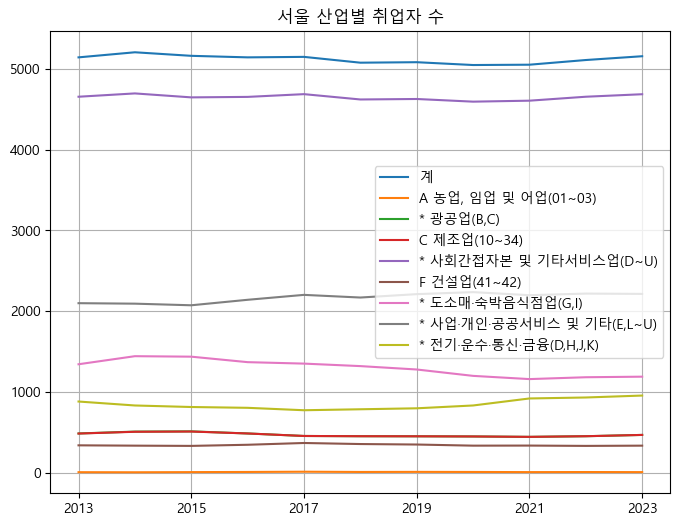

In [69]:
# 서울 취업자 수 시각화
df_emp_sido_seoul = select_area_emp(df_emp_sido, "서울특별시")

df_emp_sido_seoul.plot(kind="line", figsize=(8,6))

plt.rcParams["axes.unicode_minus"] = False
plt.title("서울 산업별 취업자 수")
plt.rc("font", family="Malgun Gothic")
plt.grid()
plt.legend()
plt.show()

C:\Users\jjjun_ii\AppData\Local\Temp\ipykernel_23524\2914273895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp_sido_selected.drop("산업별", inplace=True)


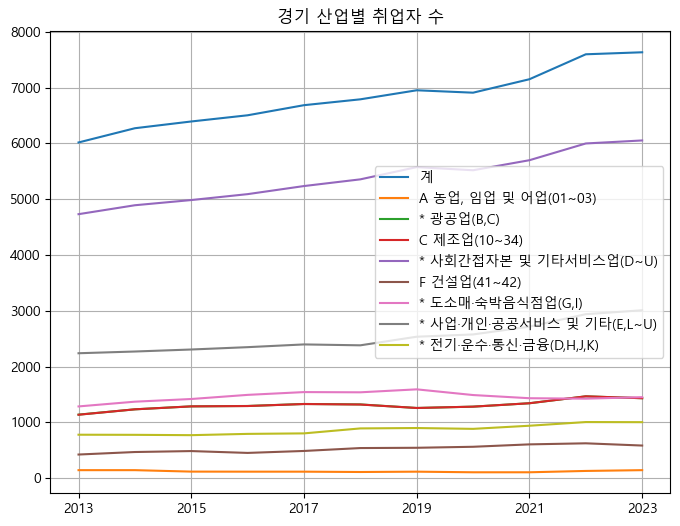

In [71]:
# 경기 취업자 수 시각화
df_emp_sido_gyeonggi = select_area_emp(df_emp_sido, "경기도")

df_emp_sido_gyeonggi.plot(kind="line", figsize=(8,6))

plt.rcParams["axes.unicode_minus"] = False
plt.title("경기 산업별 취업자 수")
plt.rc("font", family="Malgun Gothic")
plt.grid()
plt.legend()
plt.show()

C:\Users\jjjun_ii\AppData\Local\Temp\ipykernel_23524\2914273895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp_sido_selected.drop("산업별", inplace=True)


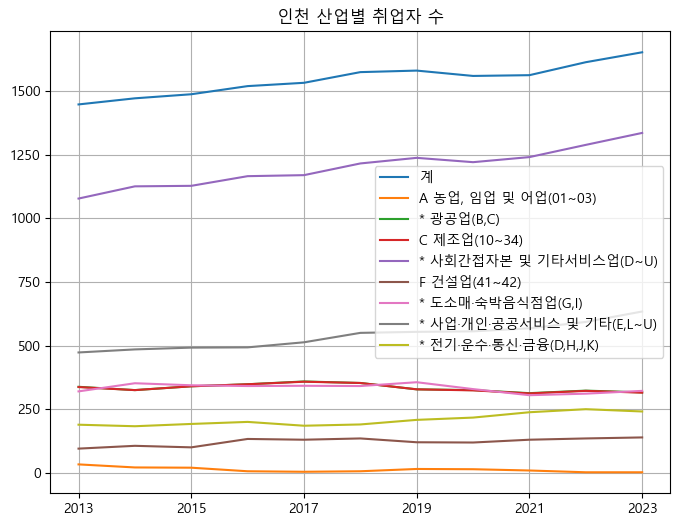

In [72]:
# 인천 취업자 수 시각화
df_emp_sido_incheon = select_area_emp(df_emp_sido, "인천광역시")

df_emp_sido_incheon.plot(kind="line", figsize=(8,6))

plt.rcParams["axes.unicode_minus"] = False
plt.title("인천 산업별 취업자 수")
plt.rc("font", family="Malgun Gothic")
plt.grid()
plt.legend()
plt.show()

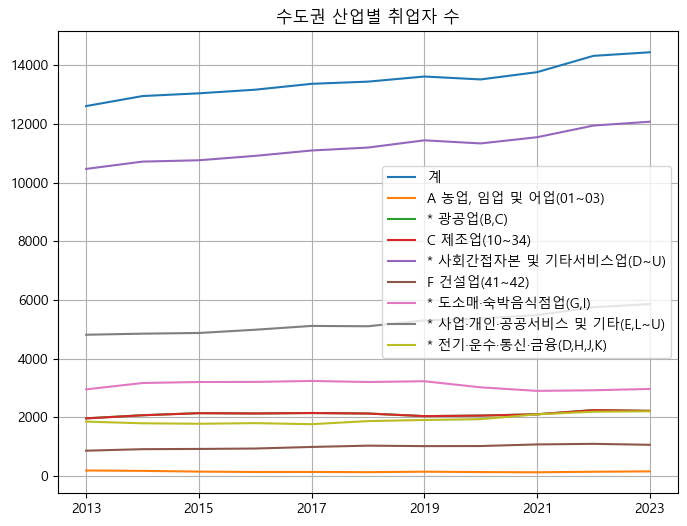

In [73]:
# 수도권 취업자 수 시각화
df_emp_sido_capital = df_emp_sido_seoul + df_emp_sido_gyeonggi + df_emp_sido_incheon

df_emp_sido_capital.plot(kind="line", figsize=(8,6))

plt.rcParams["axes.unicode_minus"] = False
plt.title("수도권 산업별 취업자 수")
plt.rc("font", family="Malgun Gothic")
plt.grid()
plt.legend()
plt.show()

C:\Users\jjjun_ii\AppData\Local\Temp\ipykernel_23524\3334562590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp_sido_selected.drop("산업별", inplace=True)
C:\Users\jjjun_ii\AppData\Local\Temp\ipykernel_23524\3334562590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emp_sido_selected.drop("산업별", inplace=True)
C:\Users\jjjun_ii\AppData\Local\Temp\ipykernel_23524\3334562590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

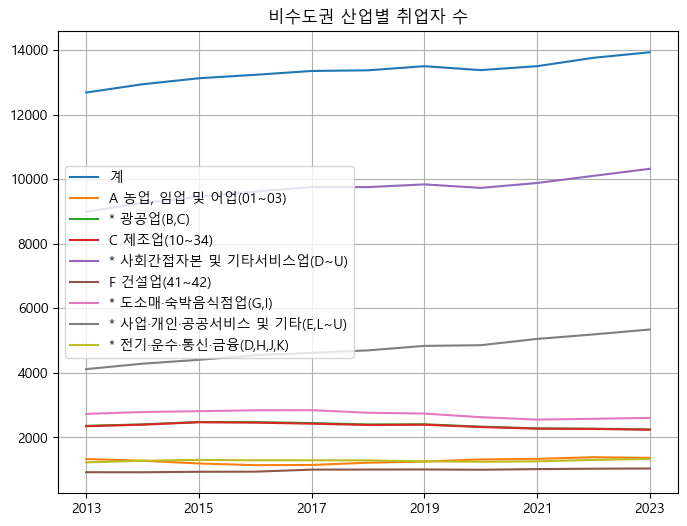

In [88]:
# 비수도권 취업자 수 시각화
area_li = list(df_emp_sido.columns.unique())

capital_li = ["서울특별시", "인천광역시", "경기도"]
for capital_area in capital_li:
    area_li.remove(capital_area)

count = 0
for area_name in area_li:
    df_emp_sido_selected = select_area_emp(df_emp_sido, area_name)
    if count == 0:
        df_emp_sido_noncapital = df_emp_sido_selected
        count += 1
    else:
        df_emp_sido_noncapital += df_emp_sido_selected

df_emp_sido_noncapital.plot(kind="line", figsize=(8,6))

plt.rcParams["axes.unicode_minus"] = False
plt.title("비수도권 산업별 취업자 수")
plt.rc("font", family="Malgun Gothic")
plt.grid()
plt.legend()
plt.show()

##### 2. 산업/연령별 취업자

##### 3. 전국 시군구 단위 소득 구간대별 주민 비율

##### 4. 임금 근로 일자리 동향

##### 5. 일자리 질 지수 산출